Import Libraries

In [1]:
import os
import cv2
# from google.colab.patches import cv2_imshow
import numpy as np
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from random import sample
import random

In [143]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

### KNN function

In [2]:
def knn(reducedTrainD, reducedTestD, labelsTrain, labelsTest, k ):
  c=KNeighborsClassifier(n_neighbors = k)
  c.fit(reducedTrainD,labelsTrain)
  labelsPred=c.predict(reducedTestD)
  accuracy = metrics.accuracy_score(labelsTest, labelsPred)
  return accuracy

### Function to determine best number of dimensions for threshold

In [143]:
def chooseNumDim(eigVal,threshold):
    totVar=np.sum(eigVal)
    explained,numDim,eigValSum=0, 1, 0
    while(explained<=threshold):
        eigValSum+=eigVal[numDim-1]
        explained=eigValSum/totVar
        numDim +=1
    return numDim

## Part 2 : Generate the Data Matrix and the Label vector

In [221]:
D = [] # Data matrix
y = [] # Labels
label = "Faces"
for i in range(1,41): # 40 people
  for j in range(1,11): # 10 images per person
    img_name = "faces/s"+str(i)+"/"+str(j)+".pgm" # Image name
    img = cv2.imread(img_name,cv2.IMREAD_GRAYSCALE) # Read image
    img = img.flatten() # Flatten image
    D.append(img) # Add image to data matrix
    y.append(label) # Add label to labels
D = np.array(D) # Convert to numpy array
y = np.array(y) # Convert to numpy array

In [282]:
print(D.shape)
print(y.shape)

(400, 10304)
(400,)


In [283]:
f = []
yf = []
label = "Fish"
count = 0
for filee in os.listdir('fish/'):
  img = cv2.imread('fish/'+filee,cv2.IMREAD_GRAYSCALE) # Read image
  img = img.flatten() # Flatten image
  f.append(img) # Add image to data matrix
  yf.append(label) # Add label to labels
  count += 1
f = np.array(f) # Convert to numpy array
yf = np.array(yf) # Convert to numpy array
print("read " + str(count) + " fish images")

read 1316 fish images


In [284]:
print(f.shape)
print(yf.shape)

(1316, 10304)
(1316,)


In [285]:
D1 = np.append(D,f[0:200],axis=0)
y1 = np.append(y,yf[0:200],axis=0)

D2 = np.append(D,f[0:400],axis=0)
y2 = np.append(y,yf[0:400],axis=0)

D3 = np.append(D,f[0:600],axis=0)
y3 = np.append(y,yf[0:600],axis=0)

D4 = np.append(D,f[0:800],axis=0)
y4 = np.append(y,yf[0:800],axis=0)

D5 = np.append(D,f[0:1000],axis=0)
y5 = np.append(y,yf[0:1000],axis=0)

D6 = np.append(D,f[0:1200],axis=0)
y6 = np.append(y,yf[0:1200],axis=0)

## Part 3 : Split the Dataset into Training and Test sets

In [286]:
testData1 = np.array([D1[i] for i in range(0,len(D1),2)]) # Test data
trainData1 = np.array([D1[i] for i in range(1,len(D1),2)]) # Train data
testLabel1 = np.array([y1[i] for i in range(0,len(y1),2)]) # Test labels
trainLabel1 = np.array([y1[i] for i in range(1,len(y1),2)]) # Train labels

testData2 = np.array([D2[i] for i in range(0,len(D2),2)]) # Test data
trainData2 = np.array([D2[i] for i in range(1,len(D2),2)]) # Train data
testLabel2 = np.array([y2[i] for i in range(0,len(y2),2)]) # Test labels
trainLabel2 = np.array([y2[i] for i in range(1,len(y2),2)]) # Train labels

testData3 = np.array([D3[i] for i in range(0,len(D3),2)]) # Test data
trainData3 = np.array([D3[i] for i in range(1,len(D3),2)]) # Train data
testLabel3 = np.array([y3[i] for i in range(0,len(y3),2)]) # Test labels
trainLabel3 = np.array([y3[i] for i in range(1,len(y3),2)]) # Train labels

testData4 = np.array([D4[i] for i in range(0,len(D4),2)]) # Test data
trainData4 = np.array([D4[i] for i in range(1,len(D4),2)]) # Train data
testLabel4 = np.array([y4[i] for i in range(0,len(y4),2)]) # Test labels
trainLabel4 = np.array([y4[i] for i in range(1,len(y4),2)]) # Train labels

testData5 = np.array([D5[i] for i in range(0,len(D5),2)]) # Test data
trainData5 = np.array([D5[i] for i in range(1,len(D5),2)]) # Train data
testLabel5 = np.array([y5[i] for i in range(0,len(y5),2)]) # Test labels
trainLabel5 = np.array([y5[i] for i in range(1,len(y5),2)]) # Train labels

testData6 = np.array([D6[i] for i in range(0,len(D6),2)]) # Test data
trainData6 = np.array([D6[i] for i in range(1,len(D6),2)]) # Train data
testLabel6 = np.array([y6[i] for i in range(0,len(y6),2)]) # Test labels
trainLabel6 = np.array([y6[i] for i in range(1,len(y6),2)]) # Train labels

In [240]:
print(trainData1.shape)
print(testData1.shape)

(300, 10304)
(300, 10304)


## Part4 : Classification using PCA

Compute Mean

In [241]:
trainMean1 = np.mean(trainData1, axis=0) # Compute Train mean
testMean1 = np.mean(testData1, axis=0) # Compute Test mean
print(trainMean1.shape)
print(testMean1.shape)

trainMean2 = np.mean(trainData2, axis=0) # Compute Train mean
testMean2 = np.mean(testData2, axis=0) # Compute Test mean
print(trainMean2.shape)
print(testMean2.shape)

trainMean3 = np.mean(trainData3, axis=0) # Compute Train mean
testMean3 = np.mean(testData3, axis=0) # Compute Test mean
print(trainMean3.shape)
print(testMean3.shape)

trainMean4 = np.mean(trainData4, axis=0) # Compute Train mean
testMean4 = np.mean(testData4, axis=0) # Compute Test mean
print(trainMean4.shape)
print(testMean4.shape)

trainMean5 = np.mean(trainData5, axis=0) # Compute Train mean
testMean5 = np.mean(testData5, axis=0) # Compute Test mean
print(trainMean5.shape)
print(testMean5.shape)

trainMean6 = np.mean(trainData6, axis=0) # Compute Train mean
testMean6 = np.mean(testData6, axis=0) # Compute Test mean
print(trainMean6.shape)
print(testMean6.shape)


(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)
(10304,)


Center the Data

In [242]:
trainCenter1= trainData1 - trainMean1 # Center train data
testCenter1= testData1 - testMean1 # Center test data

trainCenter2= trainData2 - trainMean2 # Center train data
testCenter2= testData2 - testMean2 # Center test data

trainCenter3= trainData3 - trainMean3 # Center train data
testCenter3= testData3 - testMean3 # Center test data

trainCenter4= trainData4 - trainMean4 # Center train data
testCenter4= testData4 - testMean4 # Center test data

trainCenter5= trainData5 - trainMean5 # Center train data
testCenter5= testData5 - testMean5 # Center test data

trainCenter6= trainData6 - trainMean6 # Center train data
testCenter6= testData6 - testMean6 # Center test data


Compute Covariance Matrix

In [243]:
cova1=np.cov(trainCenter1, rowvar=False, bias=True) # Compute covariance matrix

cova2=np.cov(trainCenter2, rowvar=False, bias=True) # Compute covariance matrix

cova3=np.cov(trainCenter3, rowvar=False, bias=True) # Compute covariance matrix

cova4=np.cov(trainCenter4, rowvar=False, bias=True) # Compute covariance matrix

cova5=np.cov(trainCenter5, rowvar=False, bias=True) # Compute covariance matrix

cova6=np.cov(trainCenter6, rowvar=False, bias=True) # Compute covariance matrix

Get Eigen vectors and Eigen Values of covariance matrix

In [244]:
eigenVal1, eigenVec1 = np.linalg.eigh(cova1) # Compute eigenvalues and eigenvectors
indices1 = eigenVal1.argsort()[::-1] # Get the indices that would sort an array in descending order
eigenVal1=eigenVal1[indices1] # get eigenvalues in descending order
eigenVec1=eigenVec1[:,indices1] # get eigenvectors in descending order

eigenVal2, eigenVec2 = np.linalg.eigh(cova2) # Compute eigenvalues and eigenvectors
indices2 = eigenVal2.argsort()[::-1] # Get the indices that would sort an array in descending order
eigenVal2=eigenVal2[indices2] # get eigenvalues in descending order
eigenVec2=eigenVec2[:,indices2] # get eigenvectors in descending order

eigenVal3, eigenVec3 = np.linalg.eigh(cova3) # Compute eigenvalues and eigenvectors
indices3 = eigenVal3.argsort()[::-1] # Get the indices that would sort an array in descending order
eigenVal3=eigenVal3[indices3] # get eigenvalues in descending order
eigenVec3=eigenVec3[:,indices3] # get eigenvectors in descending order

eigenVal4, eigenVec4 = np.linalg.eigh(cova4) # Compute eigenvalues and eigenvectors
indices4 = eigenVal4.argsort()[::-1] # Get the indices that would sort an array in descending order
eigenVal4=eigenVal4[indices4] # get eigenvalues in descending order
eigenVec4=eigenVec4[:,indices4] # get eigenvectors in descending order

eigenVal5, eigenVec5 = np.linalg.eigh(cova5) # Compute eigenvalues and eigenvectors
indices5 = eigenVal5.argsort()[::-1] # Get the indices that would sort an array in descending order
eigenVal5=eigenVal5[indices5] # get eigenvalues in descending order
eigenVec5=eigenVec5[:,indices5] # get eigenvectors in descending order

eigenVal6, eigenVec6 = np.linalg.eigh(cova6) # Compute eigenvalues and eigenvectors
indices6 = eigenVal6.argsort()[::-1] # Get the indices that would sort an array in descending order
eigenVal6=eigenVal6[indices6] # get eigenvalues in descending order
eigenVec6=eigenVec6[:,indices6] # get eigenvectors in descending order

In [247]:
projTrain1 = np.matmul(trainCenter1, eigenVec1[:,0:2])
projTest1 = np.matmul(testCenter1, eigenVec1[:,0:2])
result1 = knn(projTrain1, projTest1, trainLabel1, testLabel1, 1)

projTrain2 = np.matmul(trainCenter2, eigenVec2[:,0:2])
projTest2 = np.matmul(testCenter2, eigenVec2[:,0:2])
result2 = knn(projTrain2, projTest2, trainLabel2, testLabel2, 1)

projTrain3 = np.matmul(trainCenter3, eigenVec3[:,0:2])
projTest3 = np.matmul(testCenter3, eigenVec3[:,0:2])
result3 = knn(projTrain3, projTest3, trainLabel3, testLabel3, 1)

projTrain4 = np.matmul(trainCenter4, eigenVec4[:,0:2])
projTest4 = np.matmul(testCenter4, eigenVec4[:,0:2])
result4 = knn(projTrain4, projTest4, trainLabel4, testLabel4, 1)

projTrain5 = np.matmul(trainCenter5, eigenVec5[:,0:2])
projTest5 = np.matmul(testCenter5, eigenVec5[:,0:2])
result5 = knn(projTrain5, projTest5, trainLabel5, testLabel5, 1)

projTrain6 = np.matmul(trainCenter6, eigenVec6[:,0:2])
projTest6 = np.matmul(testCenter6, eigenVec6[:,0:2])
result6 = knn(projTrain6, projTest6, trainLabel6, testLabel6, 1)

In [249]:
print("For 1st dataset, the accuracy is: ", result1)
print("For 2nd dataset, the accuracy is: ", result2)
print("For 3rd dataset, the accuracy is: ", result3)
print("For 4th dataset, the accuracy is: ", result4)
print("For 5th dataset, the accuracy is: ", result5)
print("For 6th dataset, the accuracy is: ", result6)

For 1st dataset, the accuracy is:  0.9833333333333333
For 2nd dataset, the accuracy is:  0.9625
For 3rd dataset, the accuracy is:  0.956
For 4th dataset, the accuracy is:  0.9633333333333334
For 5th dataset, the accuracy is:  0.9642857142857143
For 6th dataset, the accuracy is:  0.97


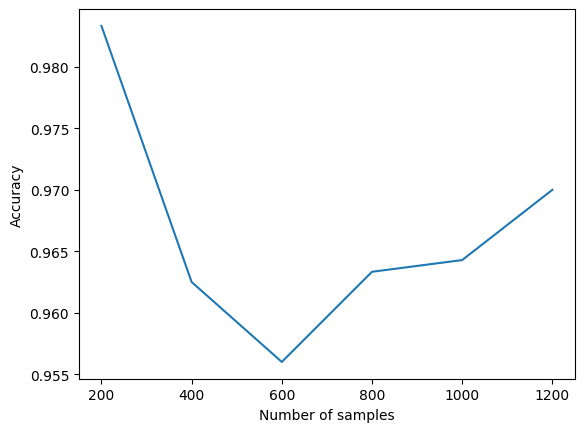

In [253]:
accuracies = [result1, result2, result3, result4, result5, result6]
fishSamples = [200, 400, 600, 800, 1000, 1200]
plt.plot(fishSamples, accuracies)
plt.xlabel("Number of samples")
plt.ylabel("Accuracy")
plt.show()

In [255]:
# get failure casses for the first eigenvector
c=KNeighborsClassifier(n_neighbors = 1)
c.fit(projTrain1,trainLabel1)
labelsPred=c.predict(projTest1)
# get the indices of the failure cases
fail1 = np.where(labelsPred != testLabel1)[0]

c.fit(projTrain2,trainLabel2)
labelsPred=c.predict(projTest2)
# get the indices of the failure cases
fail2 = np.where(labelsPred != testLabel2)[0]

c.fit(projTrain3,trainLabel3)
labelsPred=c.predict(projTest3)
# get the indices of the failure cases
fail3 = np.where(labelsPred != testLabel3)[0]

c.fit(projTrain4,trainLabel4)
labelsPred=c.predict(projTest4)
# get the indices of the failure cases
fail4 = np.where(labelsPred != testLabel4)[0]

c.fit(projTrain5,trainLabel5)
labelsPred=c.predict(projTest5)
# get the indices of the failure cases
fail5 = np.where(labelsPred != testLabel5)[0]

c.fit(projTrain6,trainLabel6)
labelsPred=c.predict(projTest6)
# get the indices of the failure cases
fail6 = np.where(labelsPred != testLabel6)[0]

In [257]:
print(fail1)
print(fail2)
print(fail3)
print(fail4)
print(fail5)
print(fail6)

[  4 202 203 244 262]
[  2   4 155 199 202 203 244 297 302 305 315 325 338 390 399]
[  1   2   4  61  91 128 155 157 174 175 203 244 325 326 390 398 399 401
 480 485 487 492]
[  2   3   4  29  64  91 155 203 222 232 244 275 399 401 485 487 492 508
 543 548 553 563]
[  2   4  63  91 152 155 167 168 203 222 244 275 302 345 480 485 487 523
 539 543 588 621 625 626 644]
[  2   4  29  61  63 122 152 155 167 172 203 244 485 487 588 607 625 626
 644 728 781 792 795 797]


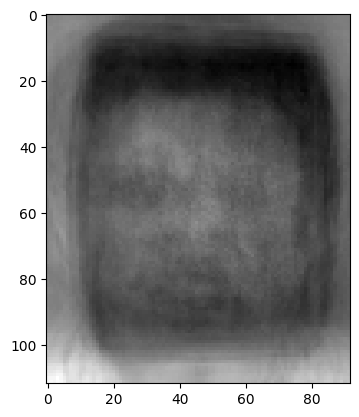

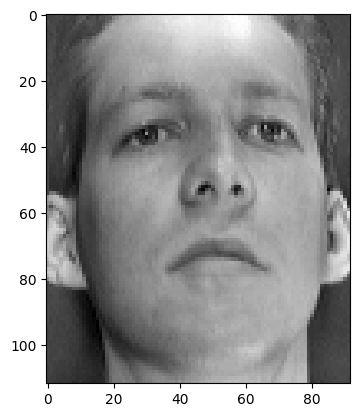

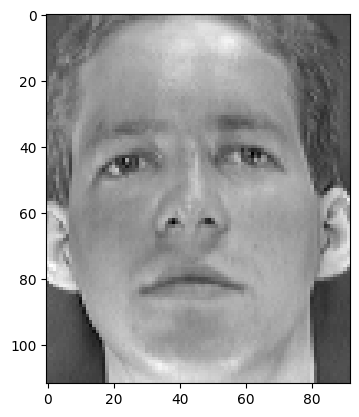

In [259]:
plt.imshow((eigenVec1[:,0] + eigenVec1[:,1]).reshape(112,92), cmap='gray')
plt.show()
plt.imshow(testCenter1[4].reshape(112,92), cmap='gray') # 4 is the index of failed image
plt.show()
plt.imshow(testCenter1[3].reshape(112,92), cmap='gray') # 3 is the index of success image
plt.show()


## Classification Using LDA

Calculate the mean vector for every class Mu1, Mu2, ..., Mu40


In [287]:
Mu1 = np.zeros((2,10304)) 
for i in range(2): 
  Mu1[i] = np.mean(trainData1[i*200:], axis=0) 
  

Mu2 = np.zeros((2,10304)) 
for i in range(2): 
  Mu2[i] = np.mean(trainData2[i*200:], axis=0) 

Mu3 = np.zeros((2,10304)) 
for i in range(2): 
  Mu3[i] = np.mean(trainData3[i*200:], axis=0) 
  
Mu4 = np.zeros((2,10304)) 
for i in range(2): 
  Mu4[i] = np.mean(trainData4[i*200:], axis=0) 
  
Mu5 = np.zeros((2,10304)) 
for i in range(2): 
  Mu5[i] = np.mean(trainData5[i*200:], axis=0) 
  
Mu6 = np.zeros((2,10304)) 
for i in range(2): 
  Mu6[i] = np.mean(trainData6[i*200:], axis=0)

In [288]:
print(Mu1.shape)
print(Mu2.shape)
print(Mu3.shape)
print(Mu4.shape)
print(Mu5.shape)
print(Mu6.shape)

(2, 10304)
(2, 10304)
(2, 10304)
(2, 10304)
(2, 10304)
(2, 10304)


Generate class specific subsets


In [275]:
trainData1.shape

(300, 10304)

In [279]:
D1 = np.zeros((1,200,10304), (1,100,10304))
D1[0] = trainData1[0:200]
D1[2] = trainData1[200:]
# for i in range(2):
#   D1[i] = trainData1[i*200:]
  
D2 = np.zeros((2,500,10304))
for i in range(2):
  D2[i] = trainData2[i*200:i*200+200]
  
D3 = np.zeros((2,700,10304))
for i in range(2):
  D3[i] = trainData3[i*200:i*200+200]
  
D4 = np.zeros((2,900,10304))
for i in range(2):
  D4[i] = trainData4[i*200:i*200+200]
  
D5 = np.zeros((2,1100,10304))
for i in range(2):
  D5[i] = trainData5[i*200:i*200+200]
  
D6 = np.zeros((2,1300,10304))
for i in range(2):
  D6[i] = trainData6[i*200:i*200+200]

ValueError: negative dimensions are not allowed

In [208]:
D

array([[[ 60.,  60.,  62., ...,  32.,  34.,  34.],
        [ 63.,  53.,  35., ...,  41.,  10.,  24.],
        [ 43.,  50.,  41., ..., 158., 153., 169.],
        ...,
        [123., 121., 126., ...,  40.,  35.,  42.],
        [125., 119., 124., ...,  36.,  39.,  40.],
        [125., 124., 124., ...,  36.,  35.,  34.]],

       [[ 66.,  71.,  64., ...,  35.,  40.,  37.],
        [ 95., 104.,  97., ...,  20.,  32.,  86.],
        [ 49.,  47.,  49., ..., 128., 123., 121.],
        ...,
        [ 36.,  36.,  33., ...,  49.,  44.,  50.],
        [ 35.,  31.,  34., ..., 128., 125., 121.],
        [ 56.,  64.,  61., ..., 127., 141., 145.]]])

Mean Vector for every class

In [304]:
μ1 = np.mean(D1[0:200], axis=0)
μ2 = np.mean(D1[200:], axis=0)

In [305]:
μ1.shape

(10304,)

Calculate the between class metrices

In [306]:
# compute between class scatter matrix
B = np.zeros((10304,10304))
B += np.matmul((μ1 - μ2).reshape(10304,1), (μ1 - μ2).reshape(1,10304))

In [310]:
# center data around the mean
Z1 = D1[0:200] - μ1
Z2 = D1[200:] - μ2

In [313]:
# class scatter matrix
S1 = np.matmul(Z1.T, Z1)
S2 = np.matmul(Z2.T, Z2)

In [314]:
# within class scatter matrix
S = S1 + S2

In [315]:
# inverse of within class scatter matrix
S_inv = np.linalg.inv(S)

Compute eigenvalues and eigenvectors

In [316]:
eigVal1, eigVec1 = np.linalg.eig(S_inv @ B)

: 

: 

In [167]:
eigVal1

array([-8.77619786e+18, -2.90795892e+18, -1.71200394e+18, ...,
        1.70783305e+18,  2.91729404e+18,  8.75898328e+18])

In [168]:
eigVec1

array([[ 0.00974221,  0.01044996, -0.01080743, ...,  0.01098917,
        -0.01037423,  0.00978335],
       [ 0.00973394,  0.01042317, -0.01076036, ...,  0.01103715,
        -0.01040075,  0.00979168],
       [ 0.00974933,  0.01047297, -0.01084778, ...,  0.01094766,
        -0.01035133,  0.00977617],
       ...,
       [ 0.00949268, -0.00875858, -0.00915237, ..., -0.00919867,
        -0.00888338, -0.00950787],
       [ 0.00123325, -0.00113888, -0.00119118, ..., -0.00119185,
        -0.00115207, -0.00123414],
       [ 0.00622489, -0.00574408, -0.00600296, ..., -0.00603027,
        -0.00582419, -0.00623424]])

Use 39 dominant eigenvectors instead of just one

In [183]:
weights = eigVec[:,eigVec.argmax()]
weights

IndexError: index 35386927 is out of bounds for axis 1 with size 10304

Apply KNN

In [180]:
result = knn(projectedTrain.T, projectedTest.T, trainLabel, testLabel,1 )

Accuracy for the multi class LDA

In [181]:
print("Accuracy:", result)

Accuracy: 0.9375


Compare the results to PCA results.

In [207]:
# Compare PCA vs LDA results
print("PCA Accuracy:", a3)
print("LDA Accuracy:", result)

PCA Accuracy: 0.94
LDA Accuracy: 0.945
